# 2.2 간단한 Retrieval 에이전트 (feat. PDF 전처리 꿀팁)

- 참고: [PDF Loader 비교 분석](https://velog.io/@mo_ongh/PDF-Loader-%EB%B9%84%EA%B5%90-%EB%B6%84%EC%84%9D-fitz.open-vs-PyPDFLoader)

- RAG 에이전트를 만들어봅니다

1) `PyPDFLoader`를 사용해 전처리된 데이터를 확인합니다
2) `fitz.open (PyMuPDF)`로 전체 내용을 읽어옵니다. -> PyPDFLoader 추출 텍스트와 같은 결과임
3) `PDFPlumber`로 표 내용이 정확한지 확인합니다. -> 이 파일에는 표 없음. 그림으로 삽입되어 있음

In [1]:
from dotenv import load_dotenv

load_dotenv(dotenv_path="../.env")

True

## 환경설정

- RAG 파이프라인을 위해 필요한 패키지들을 설치합니다
- 최신 버전을 설치해도 정상적으로 동작해야 하지만, 버전 명시가 필요하다면 `requirements.txt`를 참고해주세요

In [2]:
# %pip install -qU pypdf langchain-community langchain-text-splitters

1) `PyPDFLoader`를 사용해 전처리된 데이터를 확인합니다

In [8]:
from langchain_community.document_loaders import PyPDFLoader

pdf_file_path = "./documents/income_tax.pdf"
pdf_loader = PyPDFLoader(file_path=pdf_file_path)
pages = []
# for page in pdf_loader.load():
#     pages.append(page)
async for page in pdf_loader.alazy_load():
    pages.append(page)
len(pages)

133

In [4]:
print(pages[35].page_content)  # 표 내용이 없음

법제처                                                            36                                                       국가법령정보센터
소득세법
② 거주자의 퇴직소득에 대한 소득세는 다음 각 호의 순서에 따라 계산한 금액(이하 “퇴직소득 산출세액”이라 한다
)으로 한다.<개정 2013. 1. 1., 2014. 12. 23.>
1. 해당 과세기간의 퇴직소득과세표준에 제1항의 세율을 적용하여 계산한 금액
2. 제1호의 금액을 12로 나눈 금액에 근속연수를 곱한 금액
3. 삭제<2014. 12. 23.>
[전문개정 2009. 12. 31.]
 
           제2관 세액공제 <개정 2009. 12. 31.>
 
제56조(배당세액공제) ① 거주자의 종합소득금액에 제17조제3항 각 호 외의 부분 단서가 적용되는 배당소득금액이 합
산되어 있는 경우에는 같은 항 각 호 외의 부분 단서에 따라 해당 과세기간의 총수입금액에 더한 금액에 해당하는
금액을 종합소득 산출세액에서 공제한다. <개정 2009. 12. 31.>
② 제1항에 따른 공제를 “배당세액공제”라 한다.<개정 2009. 12. 31.>
③ 삭제<2003. 12. 30.>
④ 제1항을 적용할 때 배당세액공제의 대상이 되는 배당소득금액은 제14조제2항의 종합소득과세표준에 포함된 배
당소득금액으로서 이자소득등의 종합과세기준금액을 초과하는 것으로 한다.<개정 2009. 12. 31.>
⑤ 삭제<2006. 12. 30.>
⑥ 배당세액공제액의 계산 등에 필요한 사항은 대통령령으로 정한다.<개정 2009. 12. 31.>
[제목개정 2009. 12. 31.]
 
제56조의2(기장세액공제) ① 제160조제3항에 따른 간편장부대상자가 제70조 또는 제74조에 따른 과세표준확정신고를
할 때 복식부기에 따라 기장(記帳)하여 소득금액을 계산하고 제70조제4항제3호에 따른 서류를 제출하는 경우에는
해당 장부에 의하여 계산한 사업소득금액이 

2) `fitz.open (PyMuPDF)`로 전체 내용을 읽어옵니다.

In [ ]:
# %pip install pymupdf pdfplumber

In [ ]:
import fitz  # pymupdf

pdf_file_path = "./documents/income_tax.pdf"
with fitz.open(filename=pdf_file_path) as pdf_docs:
    print(f"총 페이지: {pdf_docs.page_count}")
    pdf_pages = []
    for page in pdf_docs:
        pdf_pages.append(page.get_text())
len(pdf_pages)

총 페이지: 133


133

In [ ]:
print(pdf_pages[34])

법제처                                                            35                                                       국가법령정보센터
소득세법
[전문개정 2009. 12. 31.]
 
제54조(종합소득공제 등의 배제) ① 분리과세이자소득, 분리과세배당소득, 분리과세연금소득과 분리과세기타소득만이
있는 자에 대해서는 종합소득공제를 적용하지 아니한다. <개정 2013. 1. 1.>
② 제70조제1항, 제70조의2제2항 또는 제74조에 따라 과세표준확정신고를 하여야 할 자가 제70조제4항제1호에 따
른 서류를 제출하지 아니한 경우에는 기본공제 중 거주자 본인에 대한 분(分)과 제59조의4제9항에 따른 표준세액공
제만을 공제한다. 다만, 과세표준확정신고 여부와 관계없이 그 서류를 나중에 제출한 경우에는 그러하지 아니하다.
<개정 2013. 1. 1., 2014. 1. 1.>
③ 제82조에 따른 수시부과 결정의 경우에는 기본공제 중 거주자 본인에 대한 분(分)만을 공제한다.
[전문개정 2009. 12. 31.]
[제목개정 2014. 1. 1.]
 
제54조의2(공동사업에 대한 소득공제 등 특례) 제51조의3 또는 「조세특례제한법」에 따른 소득공제를 적용하거나 제
59조의3에 따른 세액공제를 적용하는 경우 제43조제3항에 따라 소득금액이 주된 공동사업자의 소득금액에 합산과
세되는 특수관계인이 지출ㆍ납입ㆍ투자ㆍ출자 등을 한 금액이 있으면 주된 공동사업자의 소득에 합산과세되는 소득
금액의 한도에서 주된 공동사업자가 지출ㆍ납입ㆍ투자ㆍ출자 등을 한 금액으로 보아 주된 공동사업자의 합산과세되
는 종합소득금액 또는 종합소득산출세액을 계산할 때에 소득공제 또는 세액공제를 받을 수 있다. <개정 2012. 1. 1.,
2014. 1. 1.>
[전문개정 2009. 12. 31.]
[제목개정 2014. 1. 1.]
 
         제4절 세액의 계산 <개정 2009. 12. 31.>
    

In [ ]:
# print(pdf_pages[35])
# pdf_file_path = "./documents/income_tax.pdf"

with fitz.open(filename=pdf_file_path) as pdf_docs:
    page = pdf_docs[34]
    pix = page.get_pixmap()
    # pix.save("page_35.png")  # page= +1

    rect = fitz.Rect(0, 0, page.rect.width, page.rect.height)
    text = page.get_text("text", clip=rect)
    print(text)  # 테이블 추출은 안됨 -> 위 코드와 같은 결과

    # pdf_pages = []
    # for page in pdf_docs:
    #     pdf_pages.append(page.get_text())

법제처                                                            35                                                       국가법령정보센터
소득세법
[전문개정 2009. 12. 31.]
 
제54조(종합소득공제 등의 배제) ① 분리과세이자소득, 분리과세배당소득, 분리과세연금소득과 분리과세기타소득만이
있는 자에 대해서는 종합소득공제를 적용하지 아니한다. <개정 2013. 1. 1.>
② 제70조제1항, 제70조의2제2항 또는 제74조에 따라 과세표준확정신고를 하여야 할 자가 제70조제4항제1호에 따
른 서류를 제출하지 아니한 경우에는 기본공제 중 거주자 본인에 대한 분(分)과 제59조의4제9항에 따른 표준세액공
제만을 공제한다. 다만, 과세표준확정신고 여부와 관계없이 그 서류를 나중에 제출한 경우에는 그러하지 아니하다.
<개정 2013. 1. 1., 2014. 1. 1.>
③ 제82조에 따른 수시부과 결정의 경우에는 기본공제 중 거주자 본인에 대한 분(分)만을 공제한다.
[전문개정 2009. 12. 31.]
[제목개정 2014. 1. 1.]
 
제54조의2(공동사업에 대한 소득공제 등 특례) 제51조의3 또는 「조세특례제한법」에 따른 소득공제를 적용하거나 제
59조의3에 따른 세액공제를 적용하는 경우 제43조제3항에 따라 소득금액이 주된 공동사업자의 소득금액에 합산과
세되는 특수관계인이 지출ㆍ납입ㆍ투자ㆍ출자 등을 한 금액이 있으면 주된 공동사업자의 소득에 합산과세되는 소득
금액의 한도에서 주된 공동사업자가 지출ㆍ납입ㆍ투자ㆍ출자 등을 한 금액으로 보아 주된 공동사업자의 합산과세되
는 종합소득금액 또는 종합소득산출세액을 계산할 때에 소득공제 또는 세액공제를 받을 수 있다. <개정 2012. 1. 1.,
2014. 1. 1.>
[전문개정 2009. 12. 31.]
[제목개정 2014. 1. 1.]
 
         제4절 세액의 계산 <개정 2009. 12. 31.>
    

3) `PDFPlumber`로 표 내용이 정확한지 확인합니다. 

In [ ]:
import pdfplumber
from langchain_core.documents import Document

# PDF에서 표 추출 후 LangChain Document로 변환하는 함수
def load_pdf_with_tables(pdf_path):
    documents = []
    with pdfplumber.open(pdf_path) as pdf:
        for page_num, page in enumerate(pdf.pages):
            tables = page.extract_tables()
            table_text = ""
            for table in tables:
                for row in table:
                    table_text += " | ".join(str(cell) if cell else "" for cell in row) + "\n"
            documents.append(Document(page_content=table_text, metadata={'page': page_num + 1}))
    return documents

pdf_file_path = "./documents/income_tax.pdf"
pdf_table_docs = load_pdf_with_tables(pdf_file_path)
pdf_table_docs

[Document(metadata={'page': 1}, page_content=''),
 Document(metadata={'page': 2}, page_content=''),
 Document(metadata={'page': 3}, page_content=''),
 Document(metadata={'page': 4}, page_content=''),
 Document(metadata={'page': 5}, page_content=''),
 Document(metadata={'page': 6}, page_content=''),
 Document(metadata={'page': 7}, page_content=''),
 Document(metadata={'page': 8}, page_content=''),
 Document(metadata={'page': 9}, page_content=''),
 Document(metadata={'page': 10}, page_content=''),
 Document(metadata={'page': 11}, page_content=''),
 Document(metadata={'page': 12}, page_content=''),
 Document(metadata={'page': 13}, page_content=''),
 Document(metadata={'page': 14}, page_content=''),
 Document(metadata={'page': 15}, page_content=''),
 Document(metadata={'page': 16}, page_content=''),
 Document(metadata={'page': 17}, page_content=''),
 Document(metadata={'page': 18}, page_content=''),
 Document(metadata={'page': 19}, page_content=''),
 Document(metadata={'page': 20}, page_co

In [2]:
# %pip uninstall pymupdf pdfplumber

- 전처리된 데이터를 벡터화하기 위해 [Chroma](https://docs.trychroma.com/getting-started)를 활용합니다
- LangChain과의 호환을 위해 [langchain-chroma](https://python.langchain.com/docs/integrations/vectorstores/chroma/)를 설치합니다

In [18]:
%pip install -q langchain-chroma


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

In [20]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings,
    collection_name = 'income_tax_collection',
    persist_directory = './income_tax_collection'
)

In [21]:
retriever = vector_store.as_retriever(search_kwargs={'k': 3})

In [26]:
query = '연봉 5천만원 직장인의 소득세는?'

In [27]:
retriever.invoke(query)

[Document(metadata={'source': './documents/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n10년 초과 20년 이하: 400만원 + 80만원 × (납입연수 - 10년)\n20년 초과: 1,200만원 + 120만원 × (납입연수 - 20년)\n\n② 직장근로자 초과관세환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 필요한 사항은 대통령령으로 정한다. \n<대통령 2014. 12. 23.>\n<전문개정 2009. 12. 31.>\n제64조(부동산매매업자에 대한 세액 계산의 특례)\n1) 대통령령으로 정하는 부동산매매업(이하 “부동산매매업”이라 한다)을 영위하는 거주자가 이하 “부동산매매업자”라 한다)로서 종합소득세법에 제104조제1항제1호(본항을 포함한다) 및 제103조 또는 같은 조 제7항 각 호의 어느 하나에 해당하는 자산의 매매자익(이하 “주택등매매차익”이라 한다)이 있는 자의 종합소득 산출세액은 다음 각 호의 세액 중 많은 것으로 한다. \n<개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>\n1. 종합소득 산출세액\n\n다음 각 목에 따른 세액의 합계액\n  가. 주택등매매차익에 따른 세율을 적용하여 산출한 세액의 합계액\n  나. 종합소득세법 제55조에 따라 주택등매매차익에 대한 개별세액을 공제한 금액을 과세표준으로 하고 이에 제55조에 따른 세율을 적용하여 산출세액'),
 Document(metadata={'source': './documents/income_tax.txt'}, page_content='이자소득에 대해서는 다음과 같이 규정하는 세율\n가. 삭제<2017. 12. 19.>\n나. 비영업대금의 이익에 대해서는 100분의 25. 단, ‘온라인투자연계금융업 및 이용자 보호에 관한 법률’ 제 법 금융위원회에 등록한 온라인투자연계금융업자를 통해 지급받는 

- `state`를 선언하고 에이전트를 생성합니다
- 2.1강에서 진행한 것과 다르게 `messages` 커스텀 변수들을 선언합니다
    - `query`는 사용자의 질문을 저장하는 용도로 사용합니다
    - `context`는 벡터 스토어에서 추출한 데이터를 저장하는 용도로 사용합니다
    - `answer`는 최종 응답을 저장하는 용도로 사용합니다

In [1]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str

In [2]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

- `retrieve` 노드는 사용자의 질문을 받아 벡터 스토어에서 추출한 데이터를 반환합니다

In [3]:
def retrieve(state: AgentState) -> AgentState:
    """
    사용자의 질문에 기반하여 벡터 스토어에서 관련 문서를 검색합니다.

    Args:
        state (AgentState): 사용자의 질문을 포함한 에이전트의 현재 state.

    Returns:
        AgentState: 검색된 문서가 추가된 state를 반환합니다.
    """
    query = state['query']  # state에서 사용자의 질문을 추출합니다.
    docs = retriever.invoke(query)  # 질문과 관련된 문서를 검색합니다.
    return {'context': docs}  # 검색된 문서를 포함한 state를 반환합니다.

- `LangChain`의 `hub`를 통해 미리 정의된 RAG 프롬프트를 활용합니다
    - `hub`에는 이미 검증된 프롬프트들이 많기 때문에 프로젝트 진행 시 좋은 시작점이 됩니다
    - `hub`에서 프롬프트를 찾아보고, 동작을 확인한 후 커스텀 하는 것을 권장합니다

In [4]:
from langchain import hub
from langchain_openai import ChatOpenAI
prompt = hub.pull("rlm/rag-prompt")
llm = ChatOpenAI(model='gpt-4o')

/Users/jasonkang/.pyenv/versions/3.12.2/envs/inflearn-langgraph-lecture/lib/python3.12/site-packages/langsmith/client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [5]:
def generate(state: AgentState) -> AgentState:
    """
    사용자의 질문과 검색된 문서를 기반으로 응답을 생성합니다.

    Args:
        state (AgentState): 사용자의 질문과 검색된 문서를 포함한 에이전트의 현재 state.

    Returns:
        AgentState: 생성된 응답이 추가된 state를 반환합니다.
    """
    context = state['context']  # state에서 검색된 문서를 추출합니다.
    query = state['query']  # state에서 사용자의 질문을 추출합니다.
    rag_chain = prompt | llm  # RAG 프롬프트와 LLM을 연결하여 체인을 만듭니다.
    response = rag_chain.invoke({'question': query, 'context': context})  # 질문과 문맥을 사용하여 응답을 생성합니다.
    return {'answer': response}  # 생성된 응답을 포함한 state를 반환합니다.

- `node`를 추가하고 `edge`로 연결합니다

In [6]:
graph_builder.add_node('retrieve', retrieve)
graph_builder.add_node('generate', generate)

In [7]:
from langgraph.graph import START, END

graph_builder.add_edge(START, 'retrieve')
graph_builder.add_edge('retrieve', 'generate')
graph_builder.add_edge('generate', END)

In [8]:
graph = graph_builder.compile()

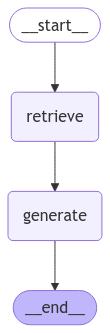

In [9]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

- 병렬처리나 `conditional_edge`가 없는 경우 `add_sequence()`를 통해 순차적으로 동작하는 그래프를 생성할 수 있습니다

In [10]:
sequence_graph_builder = StateGraph(AgentState).add_sequence([retrieve, generate])

In [11]:
sequence_graph_builder.add_edge(START, 'retrieve')
sequence_graph_builder.add_edge('generate', END)

In [12]:
sequence_graph = sequence_graph_builder.compile()

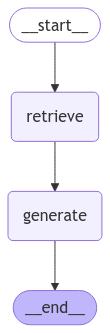

In [13]:
display(Image(sequence_graph.get_graph().draw_mermaid_png()))

In [22]:
initial_state = {'query': query}
graph.invoke(initial_state)

{'query': '연봉 5천만원 직장인의 소득세는?',
 'context': [Document(metadata={'source': './documents/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n10년 초과 20년 이하: 400만원 + 80만원 × (납입연수 - 10년)\n20년 초과: 1,200만원 + 120만원 × (납입연수 - 20년)\n\n② 직장근로자 초과관세환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 필요한 사항은 대통령령으로 정한다. \n<대통령 2014. 12. 23.>\n<전문개정 2009. 12. 31.>\n제64조(부동산매매업자에 대한 세액 계산의 특례)\n1) 대통령령으로 정하는 부동산매매업(이하 “부동산매매업”이라 한다)을 영위하는 거주자가 이하 “부동산매매업자”라 한다)로서 종합소득세법에 제104조제1항제1호(본항을 포함한다) 및 제103조 또는 같은 조 제7항 각 호의 어느 하나에 해당하는 자산의 매매자익(이하 “주택등매매차익”이라 한다)이 있는 자의 종합소득 산출세액은 다음 각 호의 세액 중 많은 것으로 한다. \n<개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>\n1. 종합소득 산출세액\n\n다음 각 목에 따른 세액의 합계액\n  가. 주택등매매차익에 따른 세율을 적용하여 산출한 세액의 합계액\n  나. 종합소득세법 제55조에 따라 주택등매매차익에 대한 개별세액을 공제한 금액을 과세표준으로 하고 이에 제55조에 따른 세율을 적용하여 산출세액'),
  Document(metadata={'source': './documents/income_tax.txt'}, page_content='이자소득에 대해서는 다음과 같이 규정하는 세율\n가. 삭제<2017. 12. 19.>\n나. 비영업대금의 이익에 대해서는 100분의 25. 단, ‘온라인투자연계금융업 및 이용자 보호